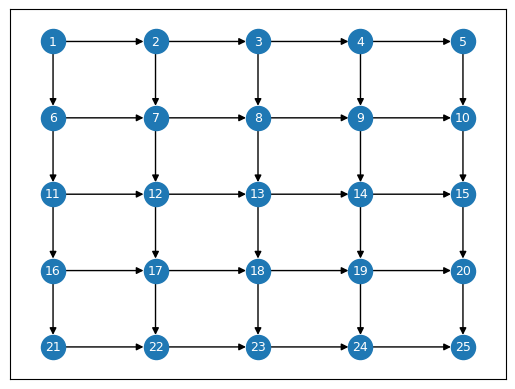

In [1]:
%run utils.py
G,pos = generate_gridNet(5, 5, "Network_5_5.tntp", draw=True, bi_direct=True)

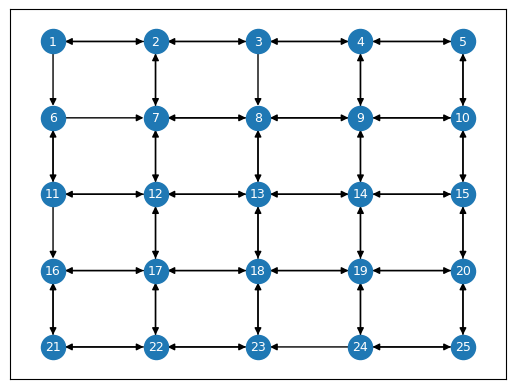

In [77]:
%run utils.py
link = 75
G,pos = generate_gridNet(5, 5, f"Network_25_{link}.tntp", draw=True, target_links=link)

In [2]:
%run utils.py

dim1 = 5
dim2 = 5
origins = [i for i in range(1,dim1*dim2+1) if (i%dim1!=0)]
dest = [i for i in range(1,dim1*dim2+1) if (i%dim1!=1)]

OD_pairs = get_fullOD_pairs(dim1, dim2)

# Create 10000 entries 
for i in range(1):
    out = generate_Random_ODs(dim1, dim2, 10000, origins, dest, OD_pairs, f'stats_10000_{i+1}.pkl')

nb_entries :  0 . Number OD:  13
nb_entries :  1 . Number OD:  168
nb_entries :  2 . Number OD:  174
nb_entries :  3 . Number OD:  107
nb_entries :  4 . Number OD:  110
nb_entries :  5 . Number OD:  14
nb_entries :  6 . Number OD:  176
nb_entries :  7 . Number OD:  20
nb_entries :  8 . Number OD:  76
nb_entries :  9 . Number OD:  91
nb_entries :  10 . Number OD:  29
nb_entries :  11 . Number OD:  166
nb_entries :  12 . Number OD:  125
nb_entries :  13 . Number OD:  6
nb_entries :  14 . Number OD:  134
nb_entries :  15 . Number OD:  53
nb_entries :  16 . Number OD:  174
nb_entries :  17 . Number OD:  124
nb_entries :  18 . Number OD:  156
nb_entries :  19 . Number OD:  180
nb_entries :  20 . Number OD:  53
nb_entries :  21 . Number OD:  79
nb_entries :  22 . Number OD:  77
nb_entries :  23 . Number OD:  86
nb_entries :  24 . Number OD:  53
nb_entries :  25 . Number OD:  84
nb_entries :  26 . Number OD:  86
nb_entries :  27 . Number OD:  168
nb_entries :  28 . Number OD:  20
nb_entries :

## Fusion of files

In [2]:
import pickle
a_file = open("stats_10000_1.pkl", "rb")

output = pickle.load(a_file)
a_file.close()

S = 0
for k,v in output.items() :
    S = S + len(v)
print(len(output))
print(S)

a_file2 = open("stats_10000_2.pkl", "rb")

output2 = pickle.load(a_file2)
a_file2.close()

S = 0
for k,v in output2.items() :
    S = S + len(v)
print(len(output2))
print(S)

a_file3 = open("stats_10000_3.pkl", "rb")

output3 = pickle.load(a_file3)
a_file3.close()

S = 0
for k,v in output3.items() :
    S = S + len(v)
print(len(output3))
print(S)

a_file4 = open("stats_10000_4.pkl", "rb")

output5 = pickle.load(a_file4)
a_file4.close()

S = 0
for k,v in output5.items() :
    S = S + len(v)
print(len(output5))
print(S)

185
10000
185
10000
185
10000
185
10000


In [3]:
output4 = {}
                
output4 = fuse_stats(output4, output)
output4 = fuse_stats(output4, output2)
output4 = fuse_stats(output4, output3)
output4 = fuse_stats(output4, output5)

S = 0
for k,v in output4.items() :
    S = S + len(v)
print(len(output4))
print(S)

# save fused file
file = open("stats_40000_1.pkl", "wb")
pickle.dump(output4 , file)
file.close()

185
40000


## Flow network : Solving

In [55]:
import pickle

with open('stats_40000_1.pkl', "rb") as a_file:
    stats = pickle.load(a_file)
    a_file.close()
a = list(stats.values())
count = 0
count2 = 0
for i in range(len(a)):
    print(i)
    count2+=len(a[i])
    print("Number of OD matrix, end of index: ", count2)

0
Number of OD matrix, end of index:  203
1
Number of OD matrix, end of index:  425
2
Number of OD matrix, end of index:  651
3
Number of OD matrix, end of index:  881
4
Number of OD matrix, end of index:  1093
5
Number of OD matrix, end of index:  1297
6
Number of OD matrix, end of index:  1525
7
Number of OD matrix, end of index:  1754
8
Number of OD matrix, end of index:  1967
9
Number of OD matrix, end of index:  2180
10
Number of OD matrix, end of index:  2379
11
Number of OD matrix, end of index:  2620
12
Number of OD matrix, end of index:  2860
13
Number of OD matrix, end of index:  3099
14
Number of OD matrix, end of index:  3314
15
Number of OD matrix, end of index:  3526
16
Number of OD matrix, end of index:  3728
17
Number of OD matrix, end of index:  3956
18
Number of OD matrix, end of index:  4163
19
Number of OD matrix, end of index:  4367
20
Number of OD matrix, end of index:  4585
21
Number of OD matrix, end of index:  4809
22
Number of OD matrix, end of index:  5039
23

In [5]:
import pickle
import random

num_nodes = 25
min_demand = 100
max_demand = 4000

# Create 1000 OD demand
od_demand_list = [generate_OD_demand(num_nodes, min_demand, max_demand) for i in range(4000)]
with open('../Generate_data/Random/od_demand_list_4000.pkl', 'wb') as f:
    pickle.dump(od_demand_list, f)

a_file = open("../Generate_data/Random/od_demand_list_4000.pkl", "rb")
output = pickle.load(a_file)
a_file.close()

for i, od_demand in enumerate(output[:2]):
    print(od_demand)

{(15, 21): 1704, (7, 17): 2695, (19, 9): 3665, (8, 9): 325, (8, 18): 240, (11, 23): 2531, (4, 2): 174, (22, 10): 3205, (3, 6): 3496, (3, 15): 2491, (3, 24): 2040, (7, 3): 3636, (15, 16): 951, (7, 12): 3125, (18, 12): 1591, (15, 25): 111, (18, 21): 728, (7, 21): 2514, (19, 4): 521, (25, 11): 2158, (25, 20): 142, (3, 1): 279, (3, 10): 2807, (14, 10): 442, (14, 19): 1349, (3, 19): 3509, (15, 2): 3236, (7, 16): 2638, (21, 18): 1681, (10, 8): 904, (10, 17): 2039, (25, 15): 174, (25, 24): 3427, (2, 22): 3850, (14, 5): 925, (22, 18): 2023, (14, 23): 1238, (15, 6): 852, (7, 2): 3692, (18, 2): 156, (18, 11): 3321, (6, 15): 219, (6, 24): 1189, (10, 3): 1156, (25, 1): 3143, (10, 12): 2854, (25, 10): 517, (2, 8): 3099, (10, 21): 460, (2, 17): 411, (22, 13): 138, (14, 9): 1246, (3, 9): 2494, (3, 18): 3091, (6, 10): 974, (21, 8): 3214, (6, 19): 1159, (21, 17): 503, (2, 12): 2561, (10, 25): 3310, (2, 21): 1994, (22, 8): 2336, (3, 4): 3112, (14, 4): 1319, (17, 6): 1100, (17, 15): 2718, (9, 11): 442, (

In [2]:
# from utils import *
from tqdm.notebook import tqdm
%run utils.py

# This file contains 385 OD matrix
a_file = open('../Generate_data/Random/od_demand_list_4000.pkl', "rb")
stats = pickle.load(a_file)
a_file.close()

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('Random/Network_25_80.tntp')
# print(links)
# print(Nodes)

# Output1: for network full 76 links
# Output2: for network 70 links
# Output3: for 70 links
# Output4: for 60 links

time = 0

# for val in tqdm(list(stats.values())):
for OD_matrix in tqdm(stats) :
    if time < 10000:
        print(time)
        data, Q, OD, O_D,n = get_data(Network, Nodes, links, cap, fft, alpha, beta, lengths, OD_matrix )
        flows, li, status, sol_time = TA_UE(data, n, OD, Q)
        if status ==2 : # if model solved to optimality => save data, flows, links, status, sol_time
            dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : li, 'model_status': status, 'solving_time':sol_time}
            file_data = open("../Solution/Random/Output1/5by5_Data{}".format(time), "wb")
            pickle.dump(dataa , file_data)
            file_data.close()
            time += 1
        else : 
            print("Error ! Networks details :")
            print(OD_matrix)
            print("*****************************")

  0%|          | 0/4000 [00:00<?, ?it/s]

0
model solved in: 1.5633389949798584
1
model solved in: 1.5832269191741943
2
model solved in: 1.8029906749725342
3
model solved in: 1.628406047821045
4
model solved in: 2.04852294921875
5
model solved in: 1.5717802047729492
6
model solved in: 1.931955099105835
7
model solved in: 1.4104108810424805
8
model solved in: 2.119814157485962
9
model solved in: 1.505948781967163
10
model solved in: 1.5462331771850586
11
model solved in: 1.9437298774719238
12
model solved in: 1.58709716796875
13
model solved in: 1.4336528778076172
14
model solved in: 1.8104631900787354
15
model solved in: 1.2483630180358887
16
model solved in: 1.4042308330535889
17
model solved in: 1.900404930114746
18
model solved in: 1.4488630294799805
19
model solved in: 1.3867452144622803
20
model solved in: 1.4791507720947266
21
model solved in: 1.3053090572357178
22
model solved in: 1.2948288917541504
23
model solved in: 1.562375783920288
24
model solved in: 1.7105560302734375
25
model solved in: 1.3483192920684814
26
mod